In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing Blacks with 0 as tenure is 0 and no total charges are recorded

In [57]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
df.isnull().sum().sum()

np.int64(0)

In [59]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [60]:
df.duplicated().sum()
df["customerID"].duplicated().sum()

np.int64(0)

In [61]:
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"
    
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Converted 0 and 1 value of senior citizen to yes/no to make it easier to understand

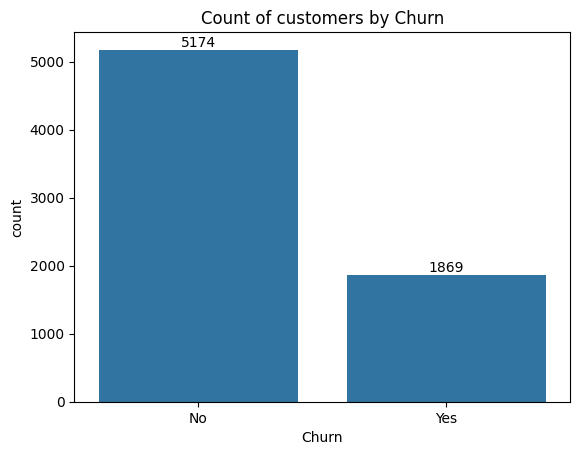

In [62]:
ax=sns.countplot(x="Churn", data=df,)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

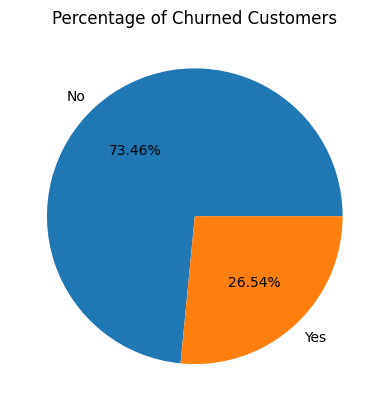

In [63]:
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

From the given pie chart we can conclude that 26.54% of out customers have churned out.
Now let's explore the reason behind it.

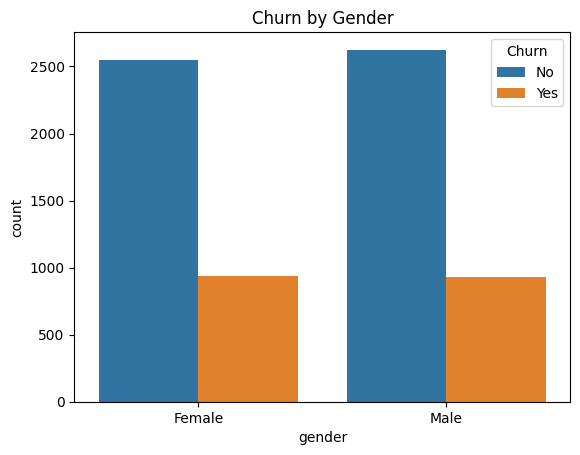

In [64]:
sns.countplot(x="gender",data=df, hue="Churn")
plt.title("Churn by Gender")
plt.show()

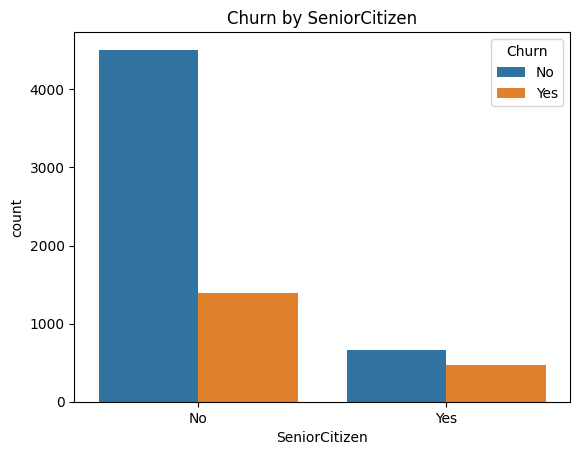

In [65]:
sns.countplot(x="SeniorCitizen",data=df, hue="Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

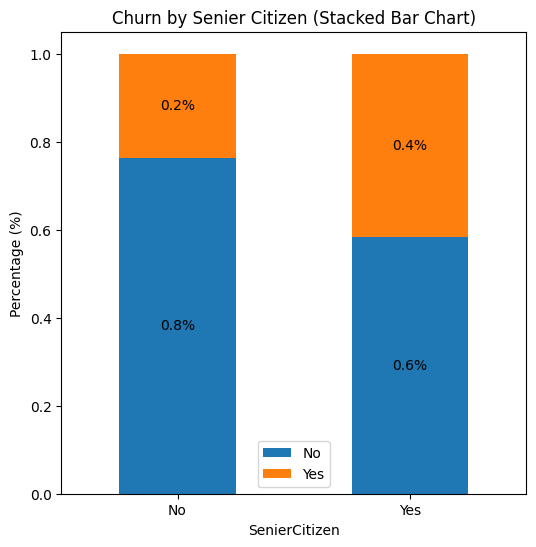

In [66]:
total_counts=df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
fig, ax=plt.subplots(figsize=(6,6))

total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

for p in ax.patches:
    width, height=p.get_width(), p.get_height()
    x,y=p.get_xy()
    ax.text(x+width/2, y+height/2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senier Citizen (Stacked Bar Chart)')
plt.xlabel('SenierCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend()
plt.show()

Comparatively a greated percentage of people in senier citizen category have churned.

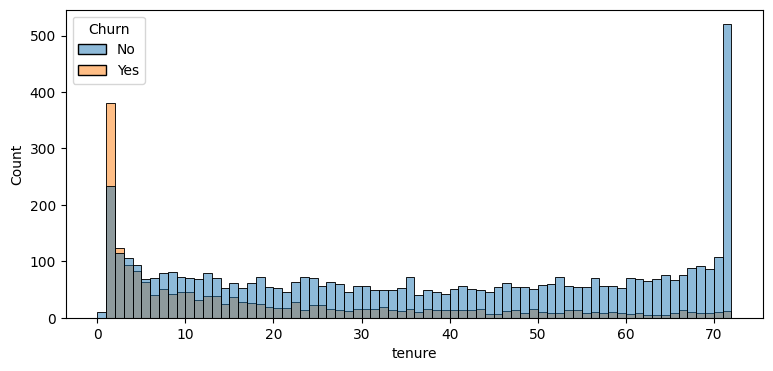

In [67]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data=df, bins=72, hue='Churn')
plt.show()

People who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned  

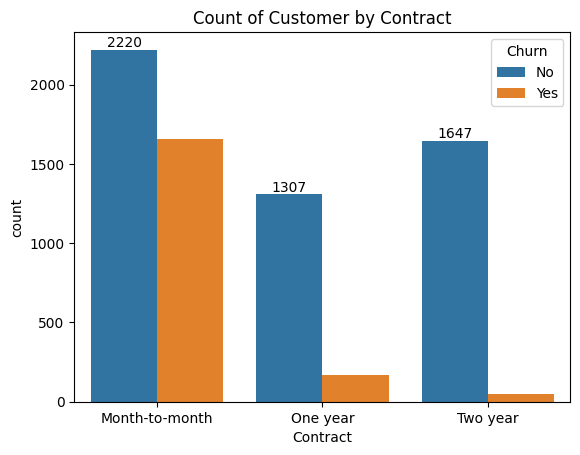

In [68]:
ax=sns.countplot(x="Contract",data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

People who have month to month contract are likely to churn then from those who have one or two year of contract.

In [69]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

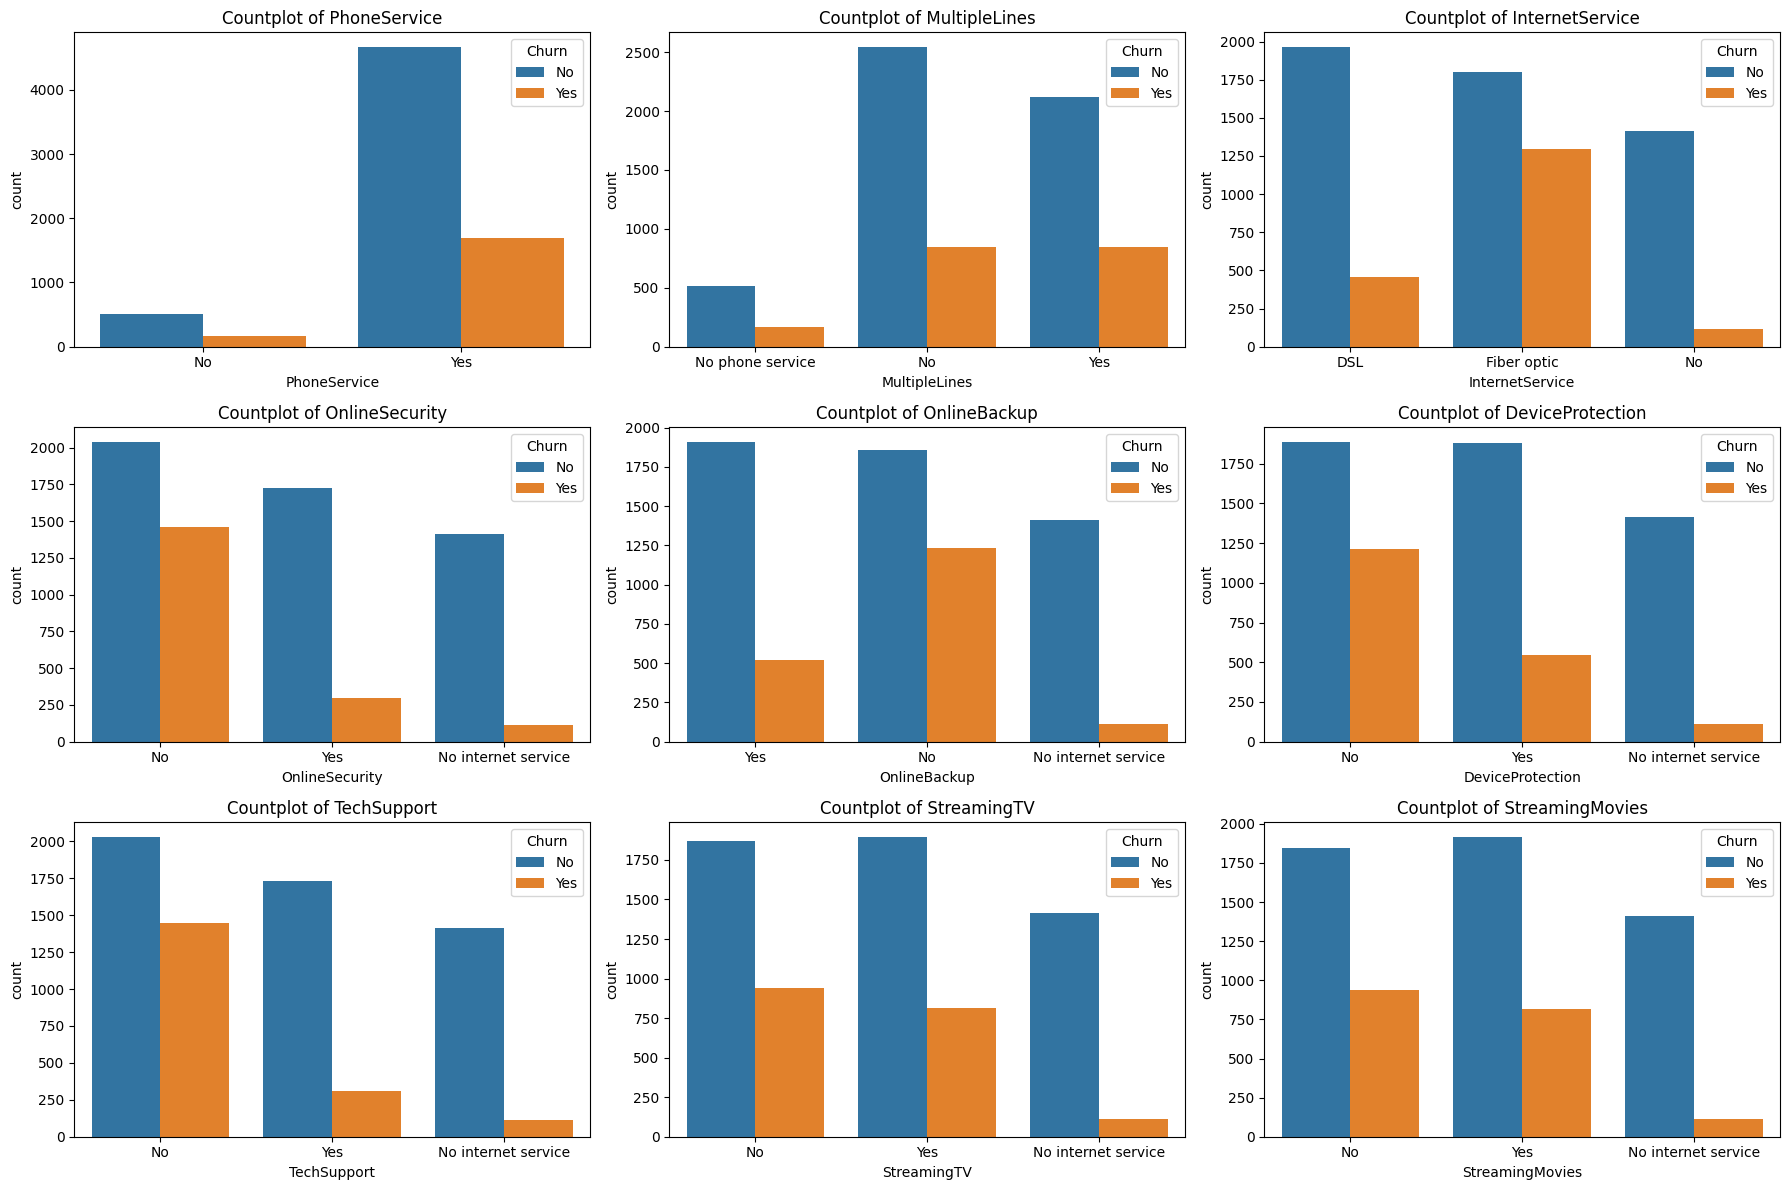

In [70]:
# Visualizing the relationship between various features and Churn
cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue="Churn")
    axes[i].set_title(f'Countplot of {col}')
    axes[i].legend(title='Churn')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From the above visualizations, we can see that:
- The majority of customers who churned are those with month-to-month contracts.
- Customers with one year or two year contracts tend to churn less.

Visualizing the relationship between PaymentMethod and Churn

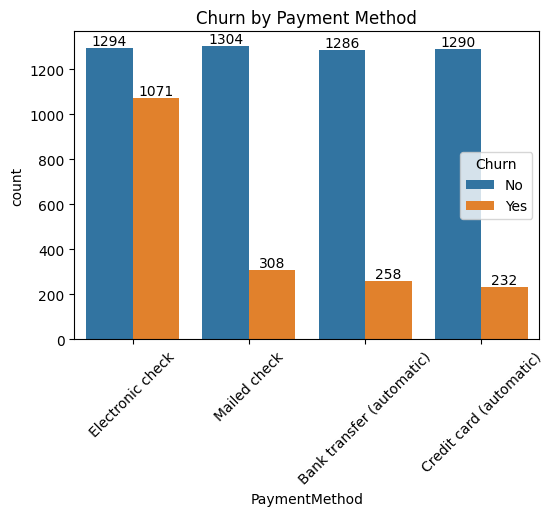

In [85]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.legend(title='Churn')  
plt.show()

Customer is likely to churn when he is using electronic check as a payment method.

Visualizing the relationship between MonthlyCharges and Churn

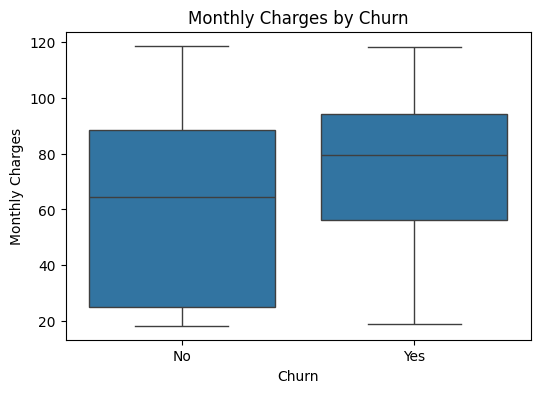

In [78]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

Visualizing the relationship between TotalCharges and Churn

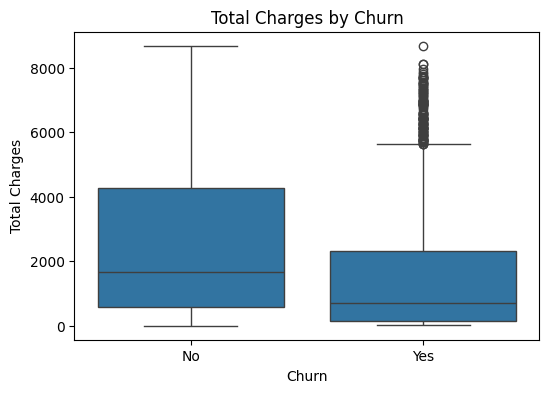

In [79]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.show()

Visualizing the relationship between Tenure and Churn

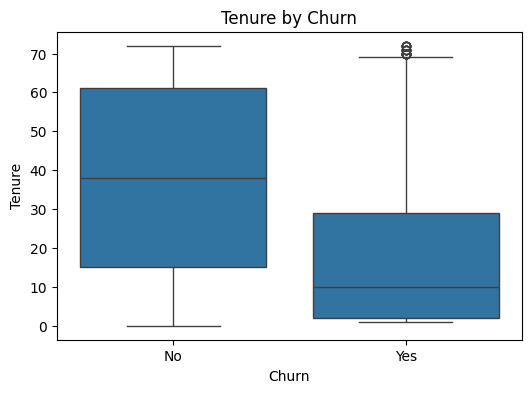

In [80]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure by Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()

Visualizing the relationship between MonthlyCharges and TotalCharges

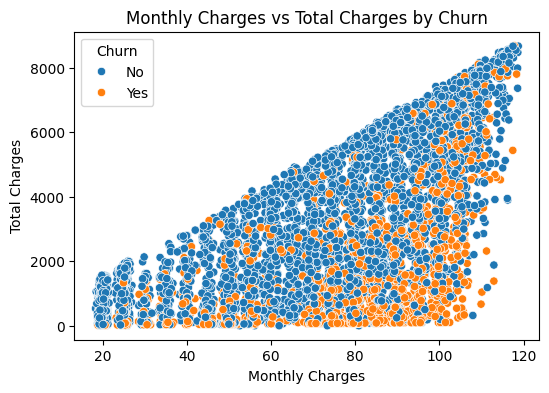

In [82]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", hue="Churn", data=df)
plt.title("Monthly Charges vs Total Charges by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.legend(title='Churn')
plt.show()

Executive Summary

This analysis explores customer churn in the Telco Customer Churn dataset using various visualizations and statistical summaries. Key findings include:

Churn Rate: About 26.5% of customers have churned, as shown by the pie chart.

Contract Type: Customers with month-to-month contracts are much more likely to churn compared to those with one-year or two-year contracts.

Senior Citizens: A higher percentage of senior citizens have churned compared to non-senior citizens.

Tenure: Customers with shorter tenure (1-2 months) are more likely to churn, while those with longer tenure tend to stay.

Payment Method: Customers using electronic checks as a payment method are more likely to churn.

Service Features: The countplots for services like PhoneService, InternetService, OnlineSecurity, and others show that certain services are associated with higher churn rates.

Monthly and Total Charges: Customers who churn tend to have higher monthly charges, but lower total charges, indicating they leave early.

Relationship Between Charges: The scatterplot of MonthlyCharges vs. TotalCharges shows that churned customers often have lower total charges, supporting the finding that they leave earlier in their tenure.

Overall, the analysis highlights that contract type, payment method, tenure, and certain service features are strong indicators of customer churn. Focusing on these areas can help the business develop targeted retention strategies.